In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect= True)

In [41]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [42]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [43]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [44]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

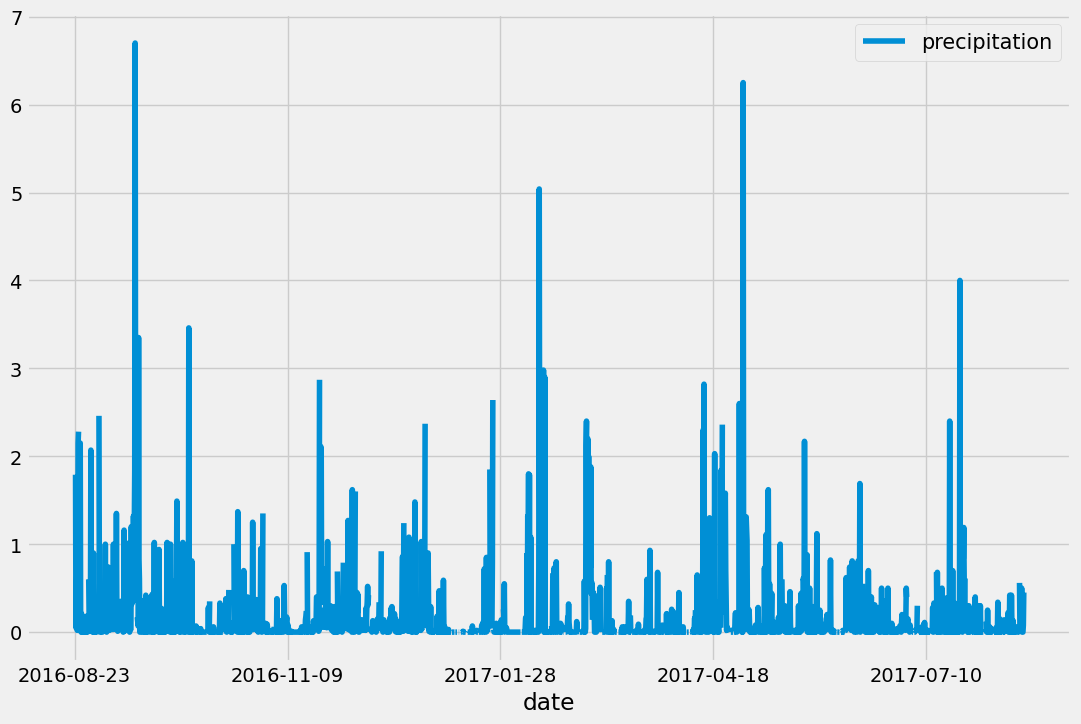

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names

climate_df = pd.DataFrame(data, columns = ["date", "prcp"])
climate_df.set_index("date", inplace=True)
# Sort the dataframe by date
climate_df = climate_df.sort_values(["date"])

# Use Pandas Plotting with Matplotlib to plot the data
plot1= climate_df.plot(figsize = (12,8))
plot1.set_xlabel("date")
plt.legend(['precipitation'], fontsize=15)
plt.savefig("output/precipitation.png")
plt.show()

In [46]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = climate_df["prcp"].describe()
summary_df = pd.DataFrame(summary)
summary_df

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).group_by(Station.station).count()


9

In [48]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station=session.query(Measurement.station).\
                            group_by(Measurement.station).\
                            order_by(func.count(Measurement.date).desc()).all()
most_active_station

[('USC00519281',),
 ('USC00519397',),
 ('USC00513117',),
 ('USC00519523',),
 ('USC00516128',),
 ('USC00514830',),
 ('USC00511918',),
 ('USC00517948',),
 ('USC00518838',)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station== "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

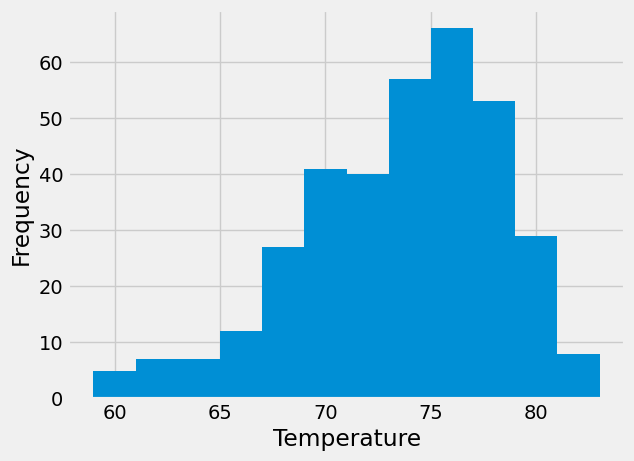

In [50]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data=session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.station=="USC00519281").\
                        filter(Measurement.date>=query_date).all()
temps_df = pd.DataFrame(temp_data, columns=["date", "tobs"])
temps_df = temps_df.set_index('date', drop=True)
plot2 = plt.hist(temps_df['tobs'],bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")

# Save the plot
plt.savefig("output/temp.png")
plt.show()

# Close Session

In [51]:
# Close Session
session.close()